In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from xml.etree import ElementTree
import matplotlib.pyplot as plt

In [6]:
# Dataframe processing from: https://www.kaggle.com/parulpandey/eda-on-covid-19-clinical-trials

path = '../input/covid19-clinical-trials-dataset/COVID-19 CLinical trials studies/COVID-19 CLinical trials studies/'

list_of_files=os.listdir('../input/covid19-clinical-trials-dataset/COVID-19 CLinical trials studies/COVID-19 CLinical trials studies')
print('Total Researches going on: ',len(list_of_files))

# Read in data

df2 = pd.DataFrame()
df = pd.DataFrame()
i=0
list_keywords=[]

for file in list_of_files:
    file_path=path+file
    #print('Processing....'+file_path)
    tree = ElementTree.parse(file_path)
    root = tree.getroot()

    trial = {}

    trial['id'] = root.find('id_info').find('nct_id').text
    trial['overall_status'] = root.find('overall_status').text
    trial['study_type'] = root.find('study_type').text
    
    if root.find('start_date') != None:
        trial['start_date'] = root.find('start_date').text
    else:
         trial['start_date'] = ''
        
    if root.find('enrollment') != None:
        trial['enrollment'] = root.find('enrollment').text
    else:
         trial['enrollment'] = ''

    trial['condition'] = root.find('condition').text.upper().replace('CORONAVIRUS INFECTIONS','CORONAVIRUS INFECTION').replace('CORONA VIRUS INFECTION','CORONAVIRUS INFECTION').replace('SARS-COV-2','SARS-COV2').replace('SARS-COV 2','SARS-COV2').replace('COVID-19','COVID').replace('COVID19','COVID').replace('COVID 19','COVID')
    if root.find('location_countries') != None:
        trial['location_countries'] = root.find('location_countries').find('country').text.upper()
    else:
        trial['location_countries'] = ''
        
    if root.find('intervention') != None:
        trial['intervention'] = root.find('intervention').find('intervention_name').text.upper()
    else:
        trial['intervention'] = ''
        
    #trial['description'] = root.find('brief_summary')[0].text
    for entry in root.findall('keyword'):
        list_keywords.append(entry.text)

    if root.find('official_title') == None:
        trial['title'] = root.find('brief_title').text
    else:
        trial['title'] = root.find('official_title').text

    date_string = root.find('required_header').find('download_date').text
    trial['date_processed'] = date_string.replace('ClinicalTrials.gov processed this data on ', '')
    
    trial['sponsors'] = root.find('sponsors').find('lead_sponsor').find('agency').text
    
    
    df  = pd.DataFrame(trial,index=[i])
    i=i+1
    
    df2 = pd.concat([df2, df])

Total Researches going on:  2595


In [7]:
df2.head()

,id,overall_status,study_type,start_date,enrollment,condition,location_countries,intervention,title,date_processed,sponsors
0,NCT04362995,Recruiting,Observational,"April 23, 2020",1517,COVID,UNITED STATES,,SJTRC-St. Jude Tracking of Viral and Host Fact...,"July 08, 2020",St. Jude Children's Research Hospital
1,NCT04114110,"Active, not recruiting",Observational,"January 6, 2020",2000,INPATIENTS,UNITED KINGDOM,RTLS DATA,"A Retrospective, Observational Analysis Using ...","July 08, 2020",The Royal Wolverhampton Hospitals NHS Trust
2,NCT04401072,Recruiting,Observational,"April 24, 2020",500,COVID,EGYPT,,Survey Studying the Change in the Attitude and...,"July 08, 2020",Damanhour University
3,NCT04407299,Completed,Observational,"April 20, 2020",360,COVID,EGYPT,SELF-ADMINISTERED STRUCTURED QUESTIONNAIRE,"Impact of COVID-19 Pandemic on Attitude, Behav...","July 08, 2020",Cairo University
4,NCT04416919,Recruiting,Interventional,"July 15, 2020",20,CORONAVIRUS INFECTION,UNITED STATES,ASSEMBLED MASK,A Proposed Alternative to the N-95 Mask Shorta...,"July 08, 2020",University of Oklahoma


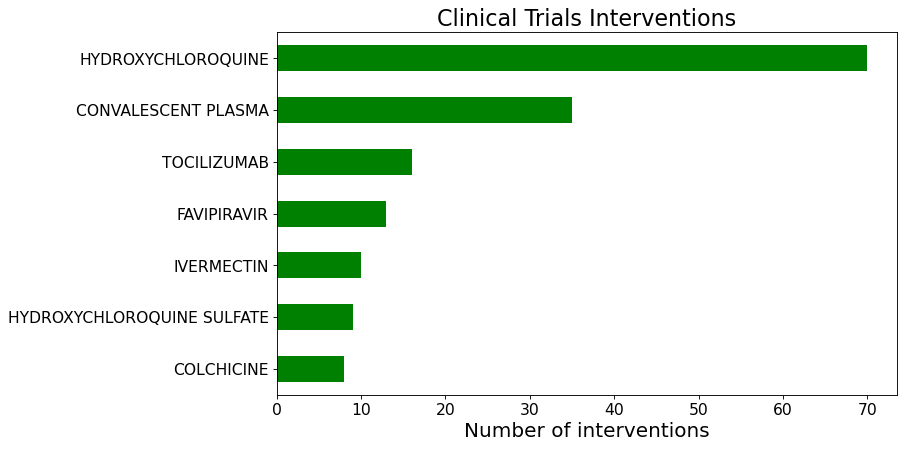

In [18]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
int_studies = df2[df2['study_type']=='Interventional']
top_int = int_studies['intervention'].value_counts().sort_values(ascending=True)[-7:]
top_int.plot(kind='barh', title='Interventions',color='green')
plt.title("Clinical Trials Interventions", fontsize=20)
plt.xlabel("Number of interventions", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('trials.svg', format='svg', bbox_inches='tight')
plt.show()